In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

In [ ]:
today = datetime.datetime.today().strftime('%Y-%m-%d')
df = yf.download("AAPL", start = "2020-01-01", end=today)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.716080,72.776606,71.466820,71.721026,135480400
2020-01-03,72.009125,72.771752,71.783969,71.941336,146322800
2020-01-06,72.582909,72.621646,70.876075,71.127866,118387200
2020-01-07,72.241562,72.849239,72.021246,72.592609,108872000
2020-01-08,73.403641,73.706271,71.943751,71.943751,132079200


In [ ]:
df.columns = df.columns.droplevel(1)
df = df.rename_axis("Date").reset_index()


df.head()

Price,Date,Close,High,Low,Open,Volume
0,2020-01-02,72.716080,72.776606,71.466820,71.721026,135480400
1,2020-01-03,72.009125,72.771752,71.783969,71.941336,146322800
2,2020-01-06,72.582909,72.621646,70.876075,71.127866,118387200
3,2020-01-07,72.241562,72.849239,72.021246,72.592609,108872000
4,2020-01-08,73.403641,73.706271,71.943751,71.943751,132079200


In [ ]:
df.columns.name = None  # Remove the index name
df.head()

,Date,Close,High,Low,Open,Volume
0,2020-01-02,72.716080,72.776606,71.466820,71.721026,135480400
1,2020-01-03,72.009125,72.771752,71.783969,71.941336,146322800
2,2020-01-06,72.582909,72.621646,70.876075,71.127866,118387200
3,2020-01-07,72.241562,72.849239,72.021246,72.592609,108872000
4,2020-01-08,73.403641,73.706271,71.943751,71.943751,132079200


In [ ]:
df_cleaned = df.copy()
df_cleaned.dtypes

,0
Date,datetime64[ns]
Close,float64
High,float64
Low,float64
Open,float64
Volume,int64


In [ ]:
#convert numeric colums to float
numeric_cols = ["Close", "High", "Low", "Open", "Volume"]
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].apply(pd.to_numeric, errors ='coerce')

In [ ]:
df_cleaned["Date"] = pd.to_datetime(df_cleaned["Date"], errors='coerce')

In [ ]:
df_cleaned.head()

,Date,Close,High,Low,Open,Volume
0,2020-01-02,72.716080,72.776606,71.466820,71.721026,135480400
1,2020-01-03,72.009125,72.771752,71.783969,71.941336,146322800
2,2020-01-06,72.582909,72.621646,70.876075,71.127866,118387200
3,2020-01-07,72.241562,72.849239,72.021246,72.592609,108872000
4,2020-01-08,73.403641,73.706271,71.943751,71.943751,132079200


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1307 entries, 0 to 1306
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1307 non-null   datetime64[ns]
 1   Close   1307 non-null   float64       
 2   High    1307 non-null   float64       
 3   Low     1307 non-null   float64       
 4   Open    1307 non-null   float64       
 5   Volume  1307 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 61.4 KB


In [ ]:
df_cleaned.describe()

,Date,Close,High,Low,Open,Volume
count,1307,1307.000000,1307.000000,1307.000000,1307.000000,1.307000e+03
mean,2022-08-06 08:24:36.358071808,155.263282,156.843540,153.509962,155.119517,8.919380e+07
min,2020-01-02 00:00:00,54.449890,55.452156,51.595986,55.350231,2.323470e+07
25%,2021-04-20 12:00:00,128.056660,129.375312,126.437557,128.131344,5.430360e+07
50%,2022-08-05 00:00:00,152.724274,154.769191,151.070009,152.609514,7.491960e+07
75%,2023-11-21 12:00:00,181.458199,182.434733,179.686303,181.059816,1.056046e+08
max,2025-03-14 00:00:00,258.735504,259.814335,257.347047,257.906429,4.265100e+08
std,NaN,44.173938,44.391662,43.884658,44.141472,5.280550e+07


In [ ]:
#Checking for NaN and ) values and fixing them
print((df_cleaned == 0).sum())

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


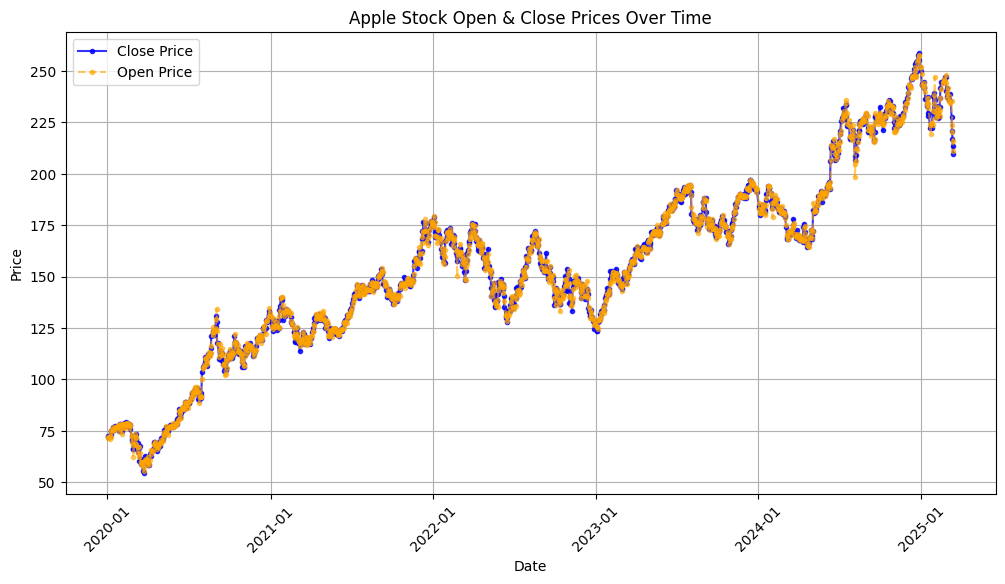

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))

plt.plot(df_cleaned["Date"], df_cleaned["Close"], marker='o', linestyle='-', label="Close Price", markersize=3, alpha=0.8, color='blue')


plt.plot(df_cleaned["Date"], df_cleaned["Open"], marker='o', linestyle='--', label="Open Price", markersize=3, alpha=0.6, color='orange')


# Format x-axis to show fewer date labels
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Auto spacing
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))  # Show year-month format

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Apple Stock Open & Close Prices Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


**MOVING AVERAGES SMOOTH OUT PRICE FLUCTATIONS AND SHOW TRENDS**

**Identify trends, Spot Buy/Sell signals(When Prices crosses the moving averages)**

In [ ]:
# Moving averages(SMA & EMA)
df_cleaned["SMA_20"] = df_cleaned["Close"].rolling(window=20).mean()
df_cleaned["SMA_50"] = df_cleaned["Close"].rolling(window=50).mean()
df_cleaned["EMA_20"] = df_cleaned["Close"].ewm(span=20, adjust=False).mean()

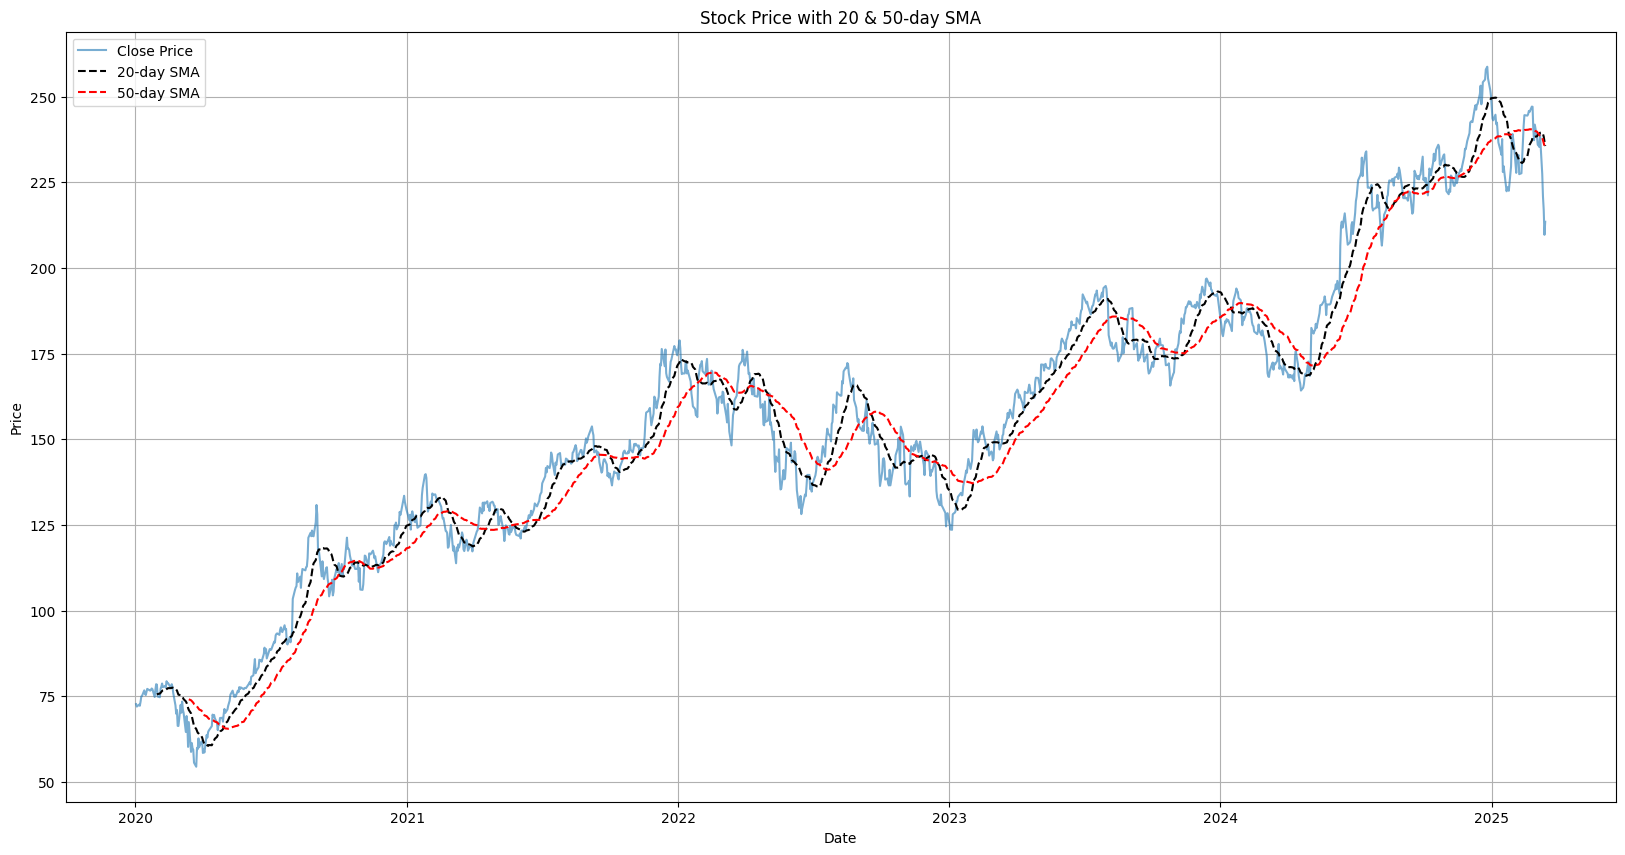

In [ ]:
# Plot Moving Averages
plt.figure(figsize=(20, 10))
plt.plot(df_cleaned["Date"], df_cleaned["Close"], label="Close Price", alpha=0.6)
plt.plot(df_cleaned["Date"], df_cleaned["SMA_20"], label="20-day SMA", linestyle='--', color='black')
plt.plot(df_cleaned["Date"], df_cleaned["SMA_50"], label="50-day SMA", linestyle='--', color='red')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Price with 20 & 50-day SMA")
plt.legend()
plt.grid()
plt.show()


**DAILY RETURN**

In [ ]:
# Calculate Daily return
df_cleaned["Daily Return"] = df_cleaned["Close"].pct_change()

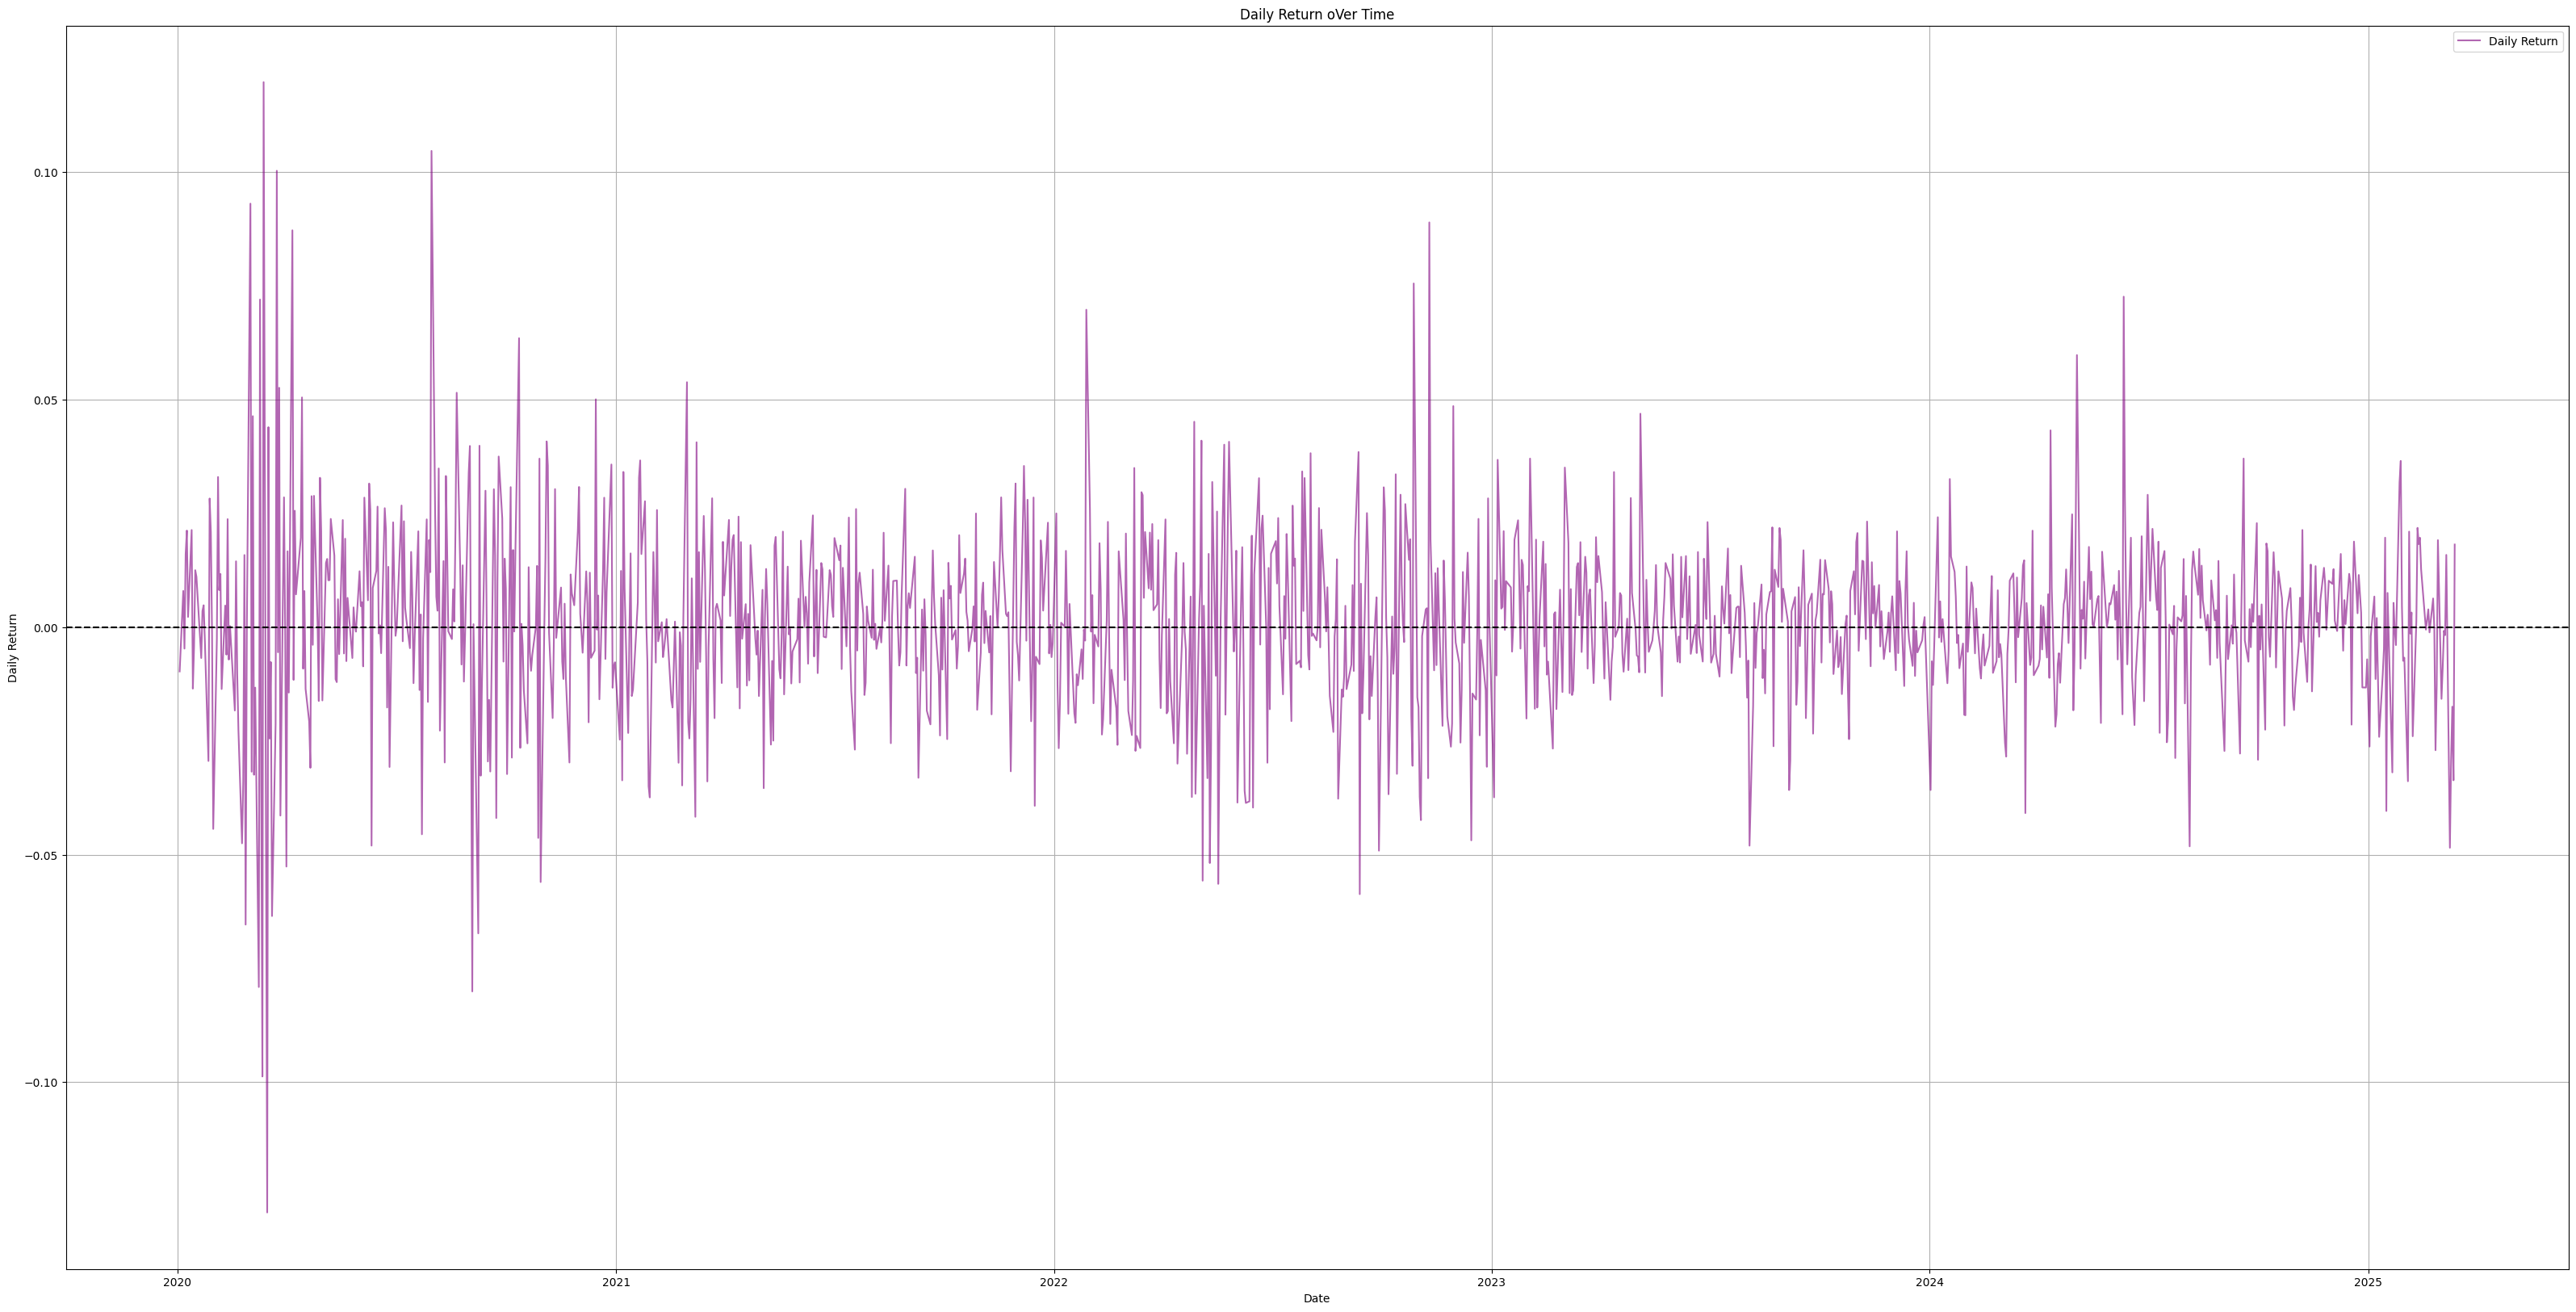

In [ ]:
# Plotting Daily returns
plt.figure(figsize=(40,20))
plt.plot(df_cleaned["Date"], df_cleaned["Daily Return"], label="Daily Return", color="purple", alpha = 0.6)
plt.axhline(0, linestyle="--", color="black")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.title("Daily Return oVer Time")
plt.grid()
plt.legend()
plt.show()

**Volatility**

In [ ]:
# volatility analysis
df_cleaned["Volatility_20"] = df_cleaned["Daily Return"].rolling(window=20).std()

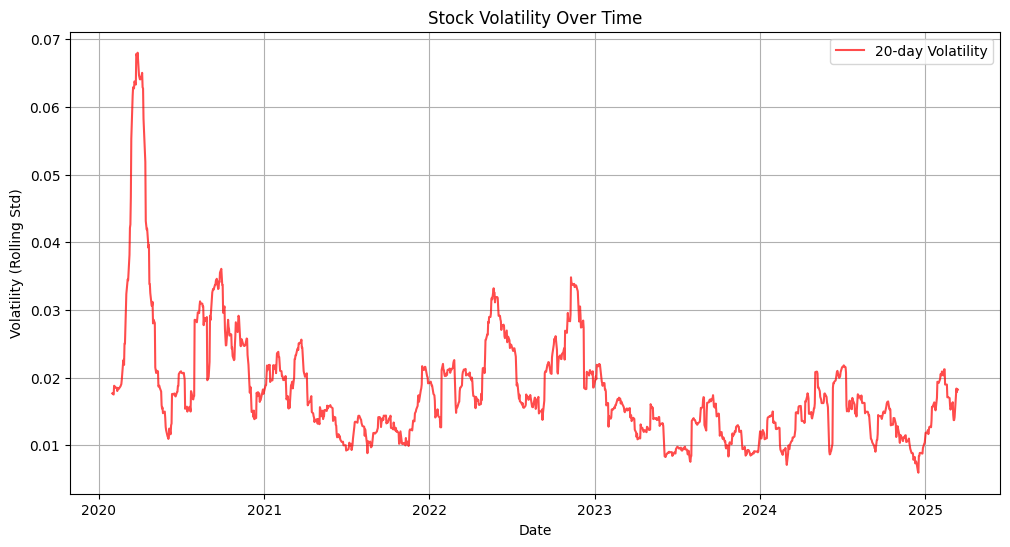

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df_cleaned["Date"], df_cleaned["Volatility_20"], label="20-day Volatility", color="red", alpha = 0.7)
plt.xlabel("Date")
plt.ylabel("Volatility (Rolling Std)")
plt.title("Stock Volatility Over Time")
plt.legend()
plt.grid()
plt.show()

**BOLLINDER BANDS**

In [ ]:
## Bollinder_Bands
df_cleaned["Middle_Band"] = df_cleaned["Close"].rolling(window=20).mean()
df_cleaned["Upper_Band"] = df_cleaned["Middle_Band"] + 2 * df_cleaned["Close"].rolling(window=20).std()
df_cleaned["Lower_Band"] = df_cleaned["Middle_Band"] - 2 * df_cleaned["Close"].rolling(window=20).std()

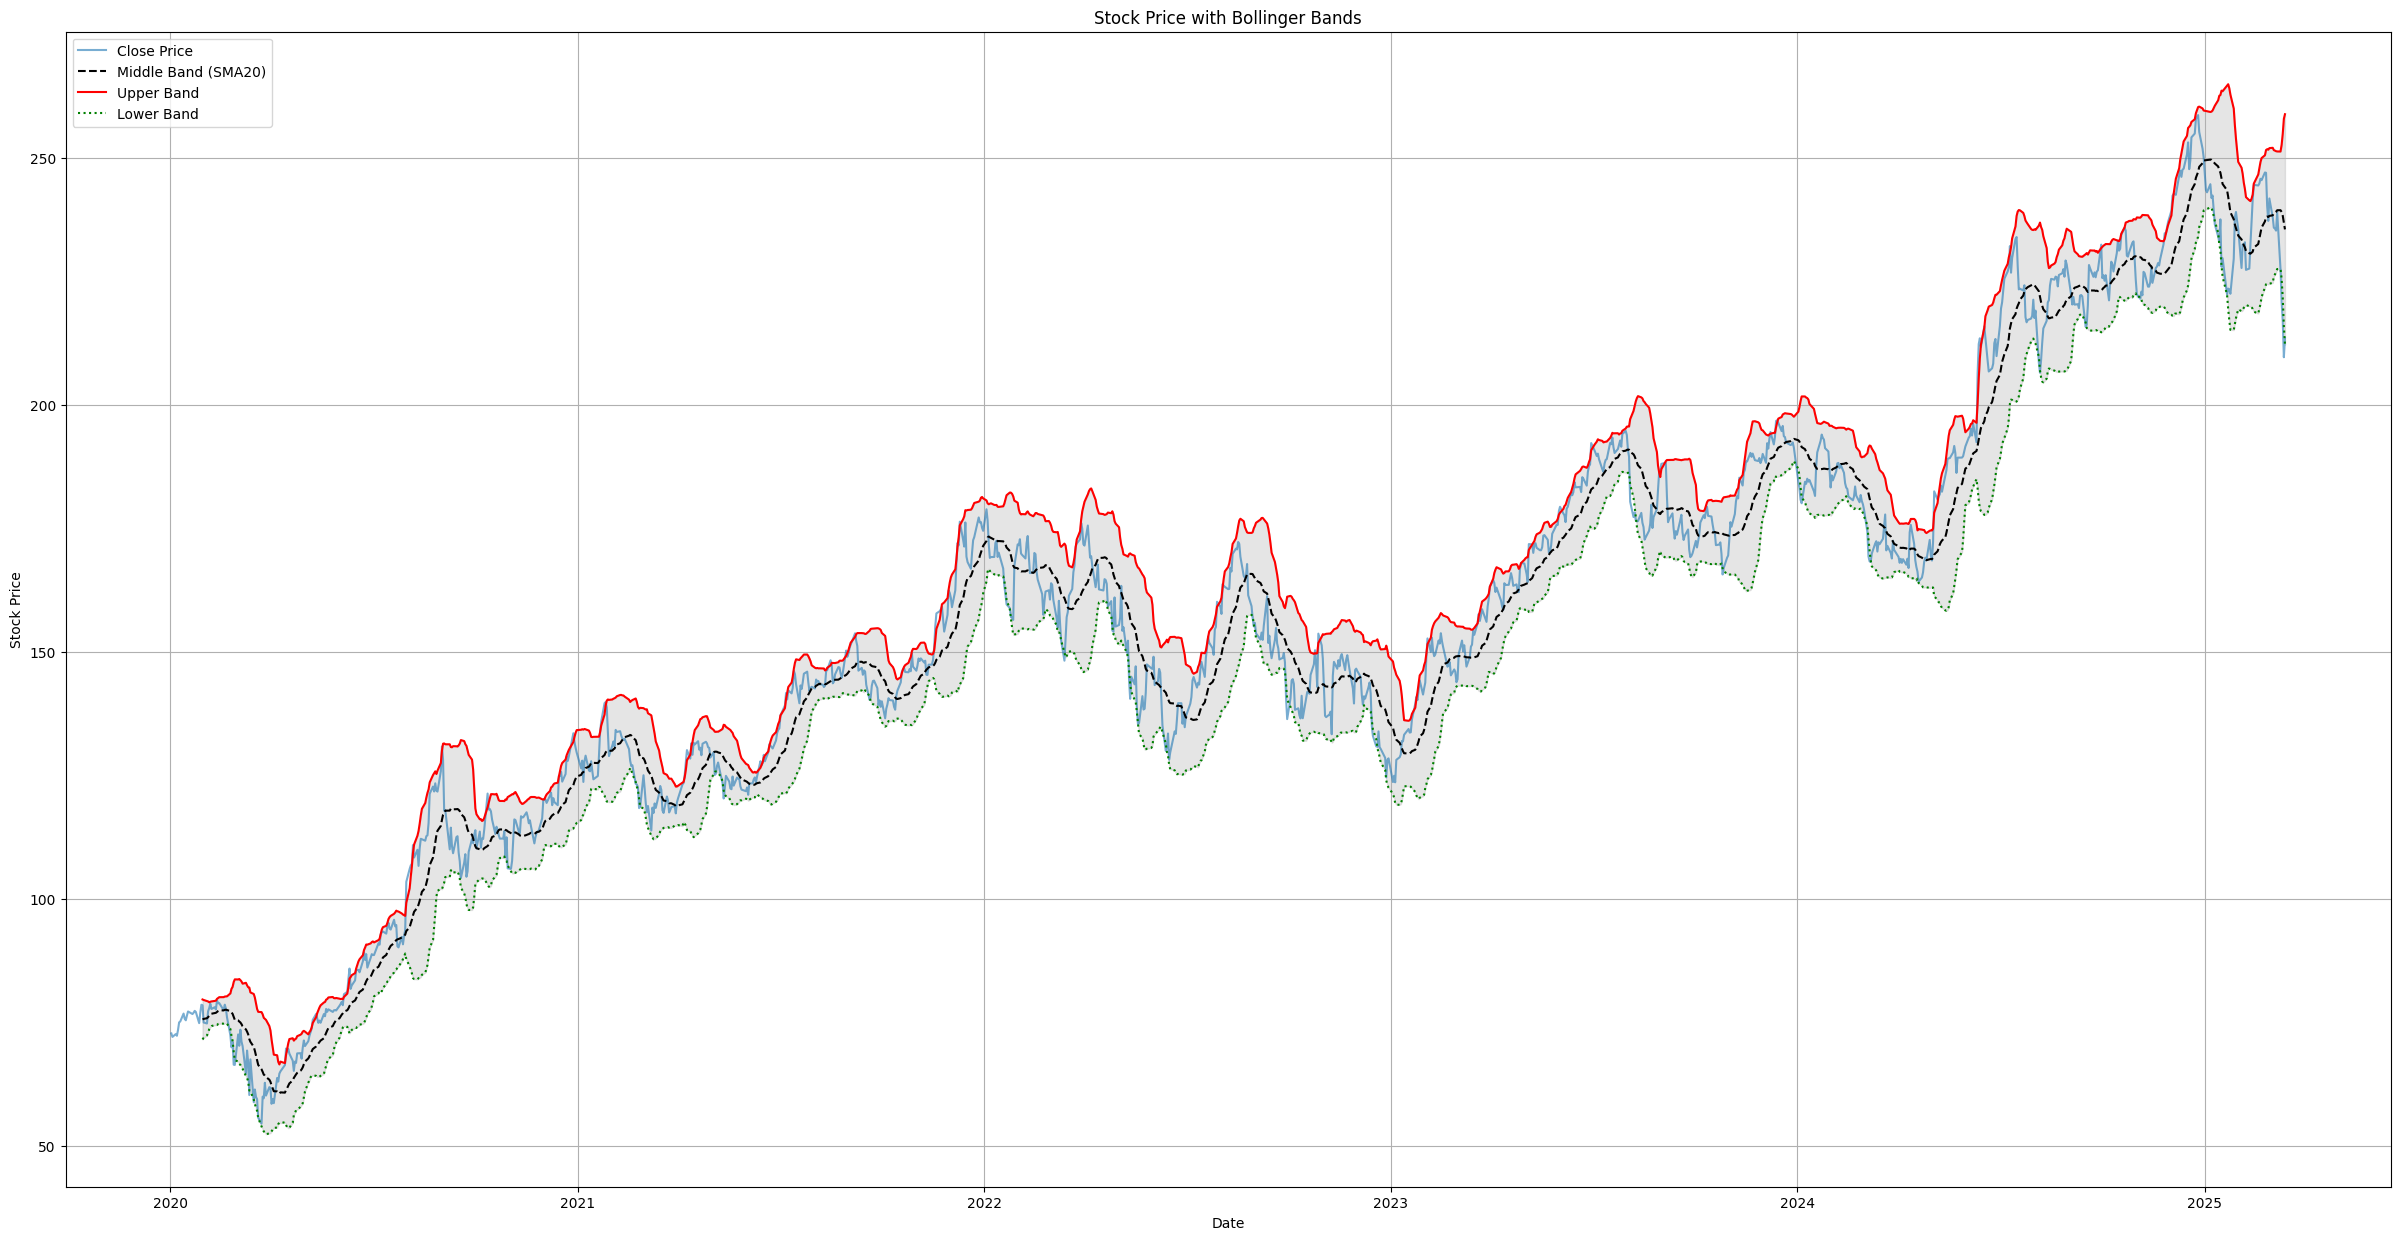

In [ ]:
## PLOTTING BOLLINDER BANDS
plt.figure(figsize=(30,15))
plt.plot(df_cleaned["Date"], df_cleaned["Close"], label = "Close Price", alpha =  0.6)
plt.plot(df_cleaned["Date"], df_cleaned["Middle_Band"], label = "Middle Band (SMA20)", linestyle = "--", color = "black")
plt.plot(df_cleaned["Date"], df_cleaned["Upper_Band"], label = "Upper Band", linestyle = "-", color = "red")
plt.plot(df_cleaned["Date"], df_cleaned["Lower_Band"], label = "Lower Band", linestyle = ":", color = "green")
plt.fill_between(df_cleaned["Date"], df_cleaned["Upper_Band"], df_cleaned["Lower_Band"], color='gray', alpha=0.2)
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price with Bollinger Bands")
plt.legend()
plt.grid()
plt.show()


In [ ]:
df_cleaned.head()

,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_20,Daily Return,Volatility_20,Middle_Band,Upper_Band,Lower_Band
0,2020-01-02,72.716080,72.776606,71.466820,71.721026,135480400,NaN,NaN,72.716080,NaN,NaN,NaN,NaN,NaN
1,2020-01-03,72.009125,72.771752,71.783969,71.941336,146322800,NaN,NaN,72.648751,-0.009722,NaN,NaN,NaN,NaN
2,2020-01-06,72.582909,72.621646,70.876075,71.127866,118387200,NaN,NaN,72.642480,0.007968,NaN,NaN,NaN,NaN
3,2020-01-07,72.241562,72.849239,72.021246,72.592609,108872000,NaN,NaN,72.604297,-0.004703,NaN,NaN,NaN,NaN
4,2020-01-08,73.403641,73.706271,71.943751,71.943751,132079200,NaN,NaN,72.680425,0.016086,NaN,NaN,NaN,NaN


**FILLING THE NaN VALUES BEFORE MOVING TO MODELLING PART**

In [ ]:
#SMA AND EMA FILLING WITH ffill()
df_cleaned[['SMA_20', 'SMA_50', 'EMA_20']] = df_cleaned[['SMA_20', 'SMA_50', 'EMA_20']].ffill()
#DAILY RETURNS FILLING and VOLATILITY WITH bfill()
df_cleaned[['Daily Return', 'Volatility_20']] = df_cleaned[['Daily Return', 'Volatility_20']].bfill()
#BOLLINGER BANDS FILLING WITH ffill()
df_cleaned[['Middle_Band', 'Upper_Band', 'Lower_Band']] = df_cleaned[['Middle_Band', 'Upper_Band', 'Lower_Band']].ffill()

print(df_cleaned.isna().sum())


Date              0
Close             0
High              0
Low               0
Open              0
Volume            0
SMA_20           19
SMA_50           49
EMA_20            0
Daily Return      0
Volatility_20     0
Middle_Band      19
Upper_Band       19
Lower_Band       19
dtype: int64


In [ ]:
df_cleaned.dropna(inplace=True)

In [ ]:
print(df_cleaned.isna().sum())

Date             0
Close            0
High             0
Low              0
Open             0
Volume           0
SMA_20           0
SMA_50           0
EMA_20           0
Daily Return     0
Volatility_20    0
Middle_Band      0
Upper_Band       0
Lower_Band       0
dtype: int64


In [ ]:
df_cleaned.head()

,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_20,Daily Return,Volatility_20,Middle_Band,Upper_Band,Lower_Band
49,2020-03-13,67.457489,67.930716,61.385659,64.283251,370732000,71.016011,74.122979,70.074979,0.119808,0.055299,71.016011,81.019299,61.012724
50,2020-03-16,58.779282,62.873271,58.242959,58.716183,322423600,70.012048,73.844243,68.999198,-0.128647,0.061639,70.012048,80.707701,59.316395
51,2020-03-17,61.363815,62.516537,57.854675,60.065481,324056000,69.209509,73.631337,68.272019,0.043970,0.062905,69.209509,79.974934,58.444083
52,2020-03-18,59.861637,60.669759,57.544052,58.187153,300233600,68.275801,73.376912,67.471030,-0.024480,0.062721,68.275801,78.873369,57.678232
53,2020-03-19,59.402969,61.358962,58.876356,60.036362,271857200,67.359445,73.120140,66.702643,-0.007662,0.062726,67.359445,77.680756,57.038134


**NOW THAT DATA IS FINE AND EDA IS DONE, WE MOVE TO FINDING ANOMALIES, WE ARE GONNA FIRST IMPLEMENT Z-SCORE THEN USE ISOLATION FOREST AND AT LAST USE DBSCAN**

**Z-SCORE(FIND HOW MANY STD() AWAY A DATA POINT IS AWAY FROM MEAN - (X - mean)/std()**

In [ ]:
## Z-SCORE
## -3 < Z < 3, then data point is fine, if Z > 3 or Z < -3, then that data point is anomaly
import seaborn as sns
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest

In [ ]:
# Load and Preprocess Data, df_cleaned is already cleaned.
df1 = df_cleaned.copy()
#focus on close price and volume for anomaly detection
df1['Z_Score_Close'] = zscore(df1['Close'])
df1['Z_Score_Volume'] = zscore(df1['Volume'])

In [ ]:
# Now we identify anomalies
threshold = 3
# detect them
df1['Anomaly_Z_Close'] = (df1['Z_Score_Close'].abs() > threshold).astype(int)
df1['Anomaly_Z_Volume'] = (df1['Z_Score_Volume'].abs() > threshold).astype(int)

# Print anomalies
print("Close Price Anomalies:", df1['Anomaly_Z_Close'].sum())
print("Volume Anomalies:", df1['Anomaly_Z_Volume'].sum())


Close Price Anomalies: 0
Volume Anomalies: 24


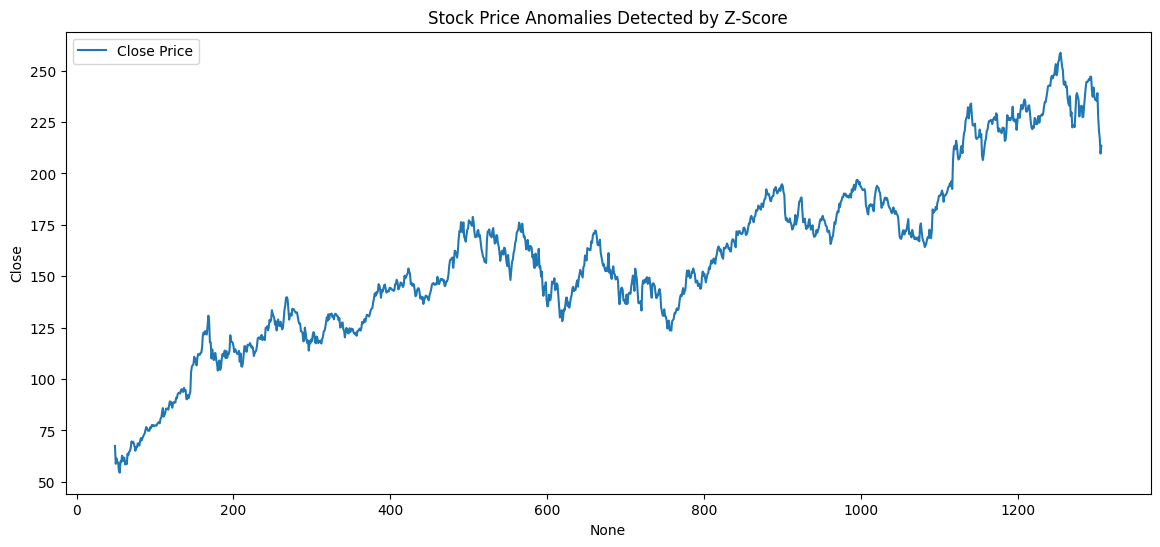

In [ ]:
# Visualizing Z-Score Anomalies
plt.figure(figsize=(14,6))
sns.lineplot(x=df1.index, y=df1['Close'], label="Close Price")
sns.scatterplot(x=df1[df1['Anomaly_Z_Close'] == 1].index,
                y=df1[df1['Anomaly_Z_Close'] == 1]['Close'],
                color='red', label="Anomalies", s=50)
plt.title("Stock Price Anomalies Detected by Z-Score")
plt.legend()
plt.show()


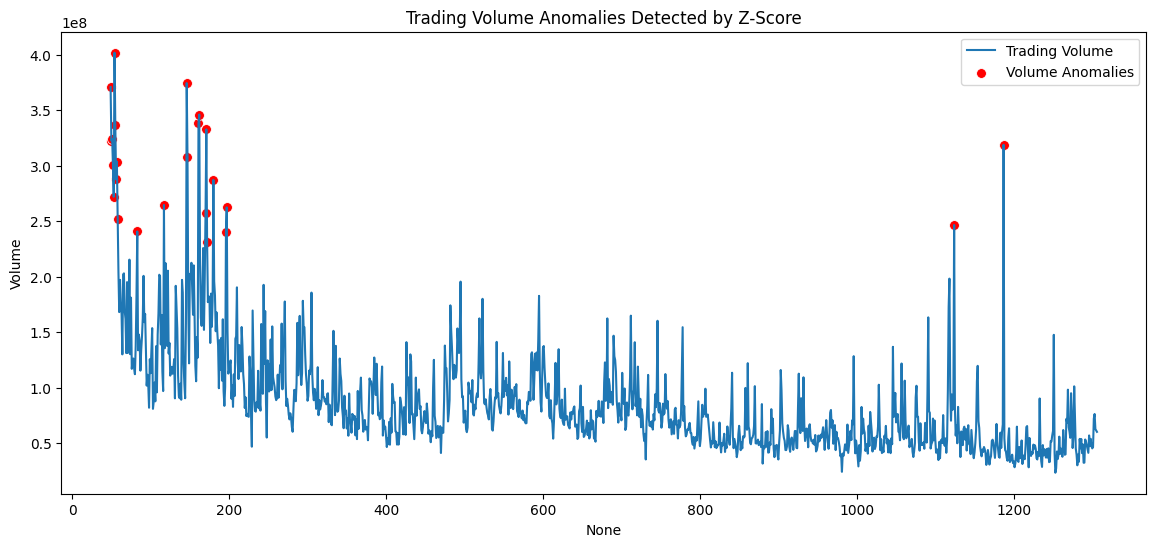

In [ ]:
# for volume data
plt.figure(figsize=(14,6))
sns.lineplot(x=df1.index, y=df1['Volume'], label="Trading Volume")

# Highlight anomalies in red
sns.scatterplot(x=df1[df1['Anomaly_Z_Volume'] == 1].index,
                y=df1[df1['Anomaly_Z_Volume'] == 1]['Volume'],
                color='red', label="Volume Anomalies", s=50)

plt.title("Trading Volume Anomalies Detected by Z-Score")
plt.legend()
plt.show()


**NOW WE DO ISolATION FOREST**

In [ ]:
df2 = df_cleaned[['Close', 'Volume']].copy()

In [ ]:
# Isolation Forest for Close Price
iso_forest_close = IsolationForest(contamination=0.02, random_state=42)
df2['Anomaly_IF_Close'] = iso_forest_close.fit_predict(df2[['Close']])
df2['Anomaly_IF_Close'] = df2['Anomaly_IF_Close'].apply(lambda x: 1 if x == -1 else 0)

# Isolation Forest for Volume
iso_forest_volume = IsolationForest(contamination=0.02, random_state=42)
df2['Anomaly_IF_Volume'] = iso_forest_volume.fit_predict(df2[['Volume']])
df2['Anomaly_IF_Volume'] = df2['Anomaly_IF_Volume'].apply(lambda x: 1 if x == -1 else 0)

# Print anomaly counts
close_anomalies = df2['Anomaly_IF_Close'].sum()
volume_anomalies = df2['Anomaly_IF_Volume'].sum()
print(f"Close Price Anomalies: {close_anomalies}")
print(f"Volume Anomalies: {volume_anomalies}")


Close Price Anomalies: 26
Volume Anomalies: 26


In [ ]:
unique_anomalies = set(df2[df2['Anomaly_IF_Close'] == 1].index) | set(df2[df2['Anomaly_IF_Volume'] == 1].index)
print(f"Unique Anomalies: {len(unique_anomalies)}")


Unique Anomalies: 42


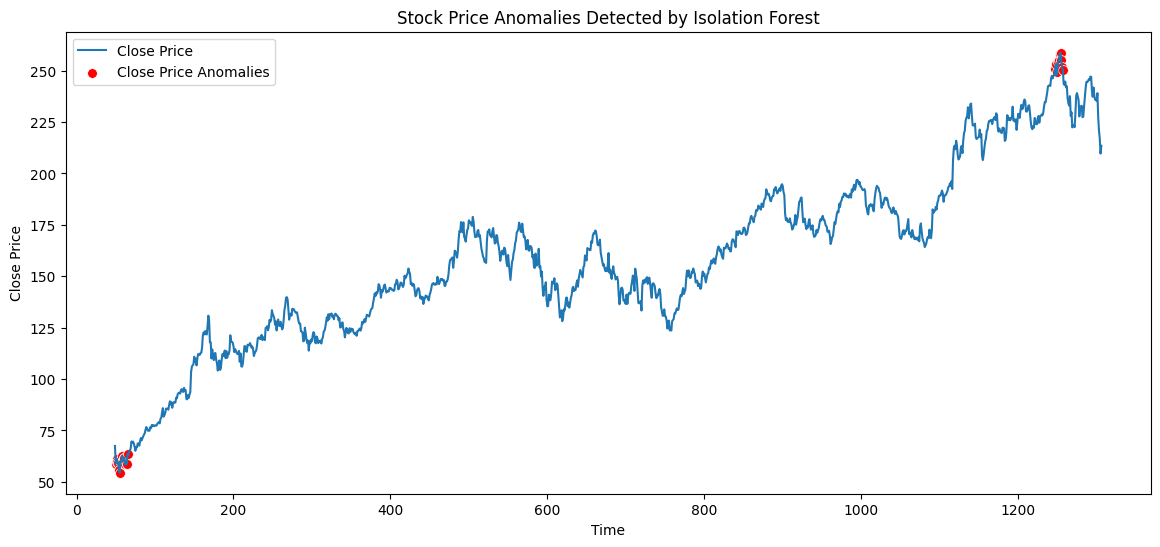

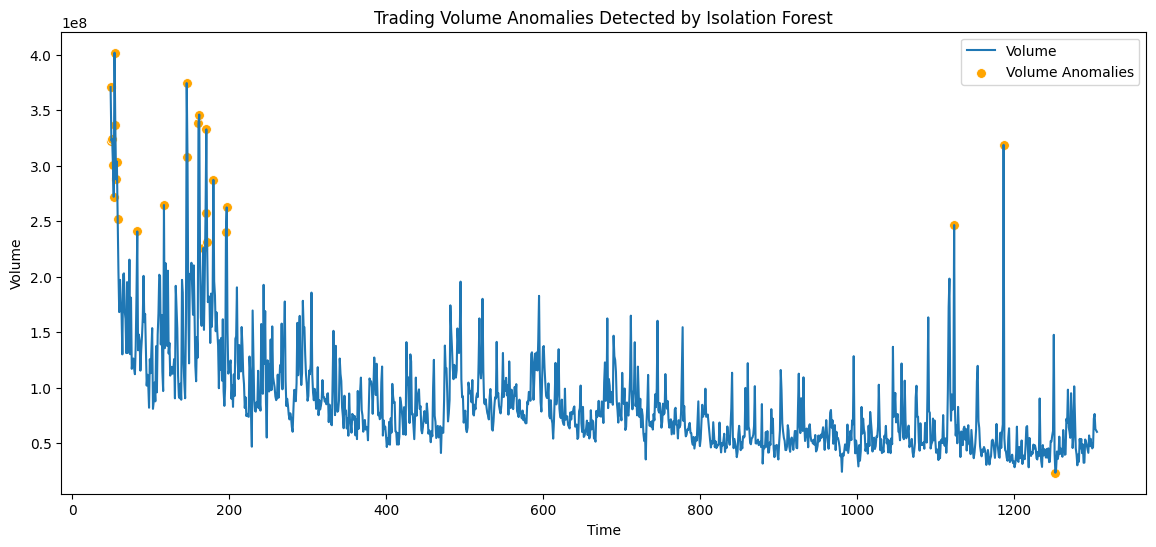

In [ ]:
# Visulaize these Anomalies

plt.figure(figsize=(14,6))

# Close Price anomalies
sns.lineplot(x=df2.index, y=df2['Close'], label="Close Price")
sns.scatterplot(x=df1[df2['Anomaly_IF_Close'] == 1].index,
                y=df1[df2['Anomaly_IF_Close'] == 1]['Close'],
                color='red', label="Close Price Anomalies", s=50)

plt.title("Stock Price Anomalies Detected by Isolation Forest")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.show()

# Volume anomalies
plt.figure(figsize=(14,6))
sns.lineplot(x=df2.index, y=df2['Volume'], label="Volume")
sns.scatterplot(x=df2[df2['Anomaly_IF_Volume'] == 1].index,
                y=df2[df2['Anomaly_IF_Volume'] == 1]['Volume'],
                color='orange', label="Volume Anomalies", s=50)

plt.title("Trading Volume Anomalies Detected by Isolation Forest")
plt.xlabel("Time")
plt.ylabel("Volume")
plt.legend()
plt.show()


**AS THIS NORmAL ISOLATION ISN"T GIVING US GOOD ENOUGH ANOMALIES, WE WILL MODIFY THE RAW DATA TO LOG_RETURNS VALUE AND USE THEN ALSO WE WILL USE FEATURE SET, INSTEAD OF ONE, WE WILL USE MULTIPLE FEATURES. THAT WILL DETECT MORE ANOMALIES COMPARED TO NORMAL ONE**

Price Return Anomalies: 22
Feature Set Anomalies: 22


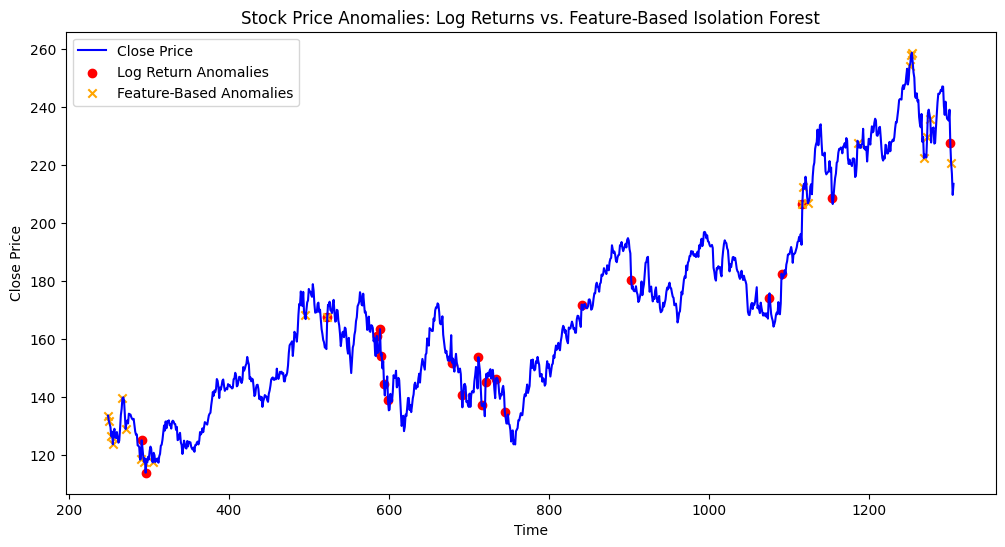

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Compute log returns
df1['Log_Returns'] = np.log(df1['Close'] / df1['Close'].shift(1))
df1.dropna(inplace=True)  # Drop NaN values

# Create moving averages as additional features
df1['MA_50'] = df1['Close'].rolling(window=50).mean()
df1['MA_200'] = df1['Close'].rolling(window=200).mean()
df1.dropna(inplace=True)  # Drop NaNs from moving averages

# Apply Isolation Forest on log returns
iso_forest_returns = IsolationForest(contamination=0.02, random_state=42)
df1['Anomaly_IF_Returns'] = iso_forest_returns.fit_predict(df1[['Log_Returns']])
df1['Anomaly_IF_Returns'] = df1['Anomaly_IF_Returns'].apply(lambda x: 1 if x == -1 else 0)

# Apply Isolation Forest on feature set
features = ['Close', 'Volume', 'MA_50', 'MA_200']
iso_forest_features = IsolationForest(contamination=0.02, random_state=42)
df1['Anomaly_IF_Features'] = iso_forest_features.fit_predict(df1[features])
df1['Anomaly_IF_Features'] = df1['Anomaly_IF_Features'].apply(lambda x: 1 if x == -1 else 0)

# Print anomaly counts
returns_anomalies = df1['Anomaly_IF_Returns'].sum()
feature_anomalies = df1['Anomaly_IF_Features'].sum()
print(f"Price Return Anomalies: {returns_anomalies}")
print(f"Feature Set Anomalies: {feature_anomalies}")

# --- Plot results ---

plt.figure(figsize=(12, 6))

# Plot Close Price
plt.plot(df1.index, df1['Close'], label='Close Price', color='blue')

# Plot log return anomalies
plt.scatter(df1.index[df1['Anomaly_IF_Returns'] == 1],
            df1['Close'][df1['Anomaly_IF_Returns'] == 1],
            color='red', label='Log Return Anomalies')

# Plot feature-based anomalies
plt.scatter(df1.index[df1['Anomaly_IF_Features'] == 1],
            df1['Close'][df1['Anomaly_IF_Features'] == 1],
            color='orange', marker='x', label='Feature-Based Anomalies')

plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Stock Price Anomalies: Log Returns vs. Feature-Based Isolation Forest')
plt.legend()
plt.show()


** WE CAN ASLO USE FEATURE BASED ISOLATION WITH LOG RETURNS AS A FEATURE AND ALSO IMPLEMENT BOLLINDER BANDS AND RSI**

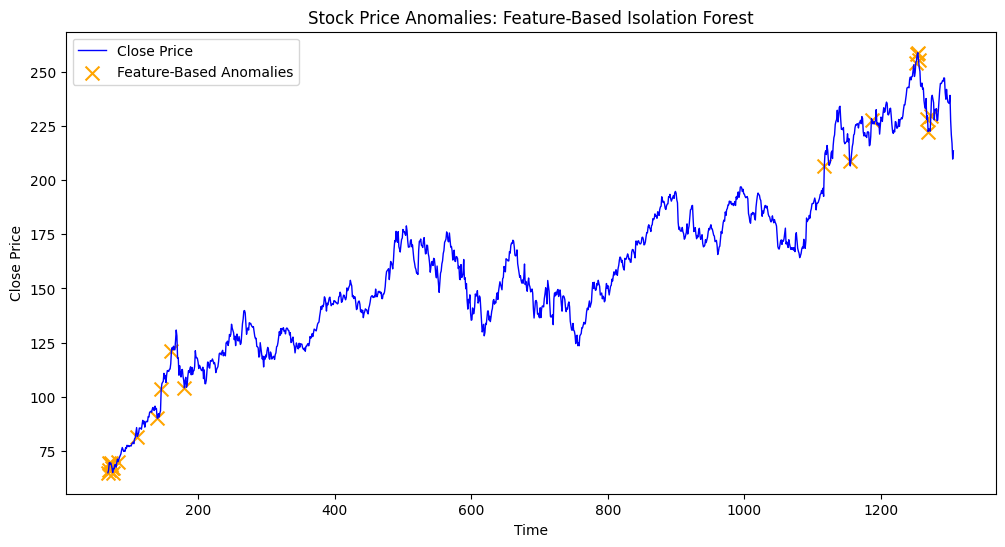

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest



df2['Log_Returns'] = np.log(df2['Close'] / df2['Close'].shift(1))


df2['MA20'] = df2['Close'].rolling(window=20).mean()
df2['STD20'] = df2['Close'].rolling(window=20).std()
df2['Upper_Band'] = df2['MA20'] + (df2['STD20'] * 2)
df2['Lower_Band'] = df2['MA20'] - (df2['STD20'] * 2)


def compute_rsi(series, period=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df2['RSI'] = compute_rsi(df2['Close'])


df2.dropna(inplace=True)


features = ['Close', 'Volume', 'MA20', 'Upper_Band', 'Lower_Band', 'RSI', 'Log_Returns']
X = df2[features]

iso_forest = IsolationForest(contamination=0.02, random_state=42)
df2['Anomaly_Score'] = iso_forest.fit_predict(X)
df2['Feature_Anomalies'] = df2['Anomaly_Score'] == -1

s
plt.figure(figsize=(12, 6))
plt.plot(df2.index, df2['Close'], color='blue', label="Close Price", linewidth=1)
plt.scatter(df2.index[df2['Feature_Anomalies']], df2['Close'][df2['Feature_Anomalies']],
            color='orange', label="Feature-Based Anomalies", marker='x', s=100)

plt.title("Stock Price Anomalies: Feature-Based Isolation Forest")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.show()


In [ ]:
print(df2['Feature_Anomalies'].value_counts())


Feature_Anomalies
False    1214
True       25
Name: count, dtype: int64


In [ ]:
# Ensure 'features' contains only numeric values
features = df2[['Close', 'Volume', 'MA20', 'Upper_Band', 'Lower_Band', 'RSI', 'Log_Returns']].astype(float)

# Iterate over different contamination values
for contamination in [0.01, 0.02, 0.05]:
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    df2['Feature_Anomalies'] = iso_forest.fit_predict(features)
    print(f"Contamination: {contamination}, Anomalies: {sum(df2['Feature_Anomalies'] == -1)}")


Contamination: 0.01, Anomalies: 13
Contamination: 0.02, Anomalies: 25
Contamination: 0.05, Anomalies: 62


In [ ]:
from sklearn.neighbors import LocalOutlierFactor


features = df2[['Close', 'Volume', 'MA20', 'Upper_Band', 'Lower_Band', 'RSI', 'Log_Returns']]

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02)
df2['LOF_Anomalies'] = lof.fit_predict(features)

print("LOF Anomalies:", sum(df2['LOF_Anomalies'] == -1))


LOF Anomalies: 25


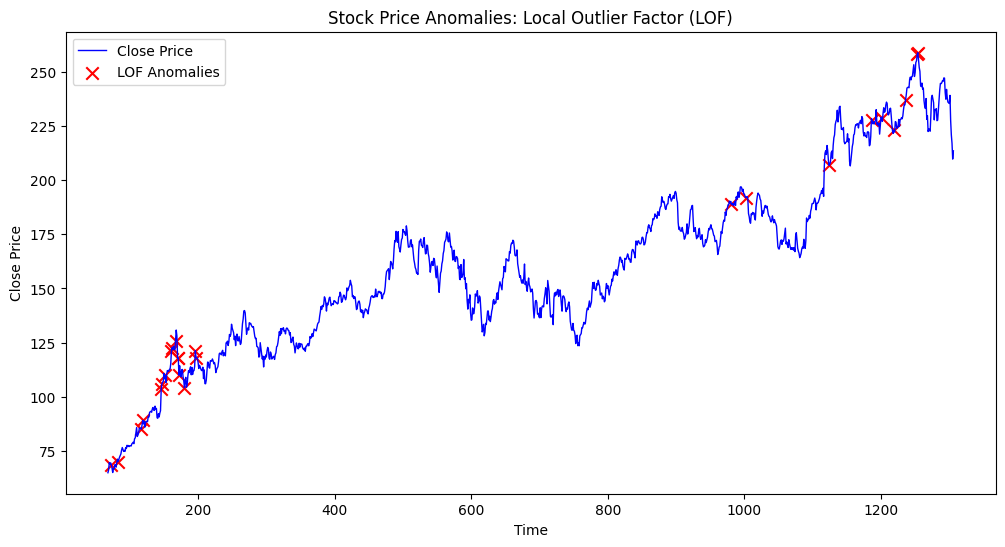

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df2.index, df2['Close'], color='blue', linewidth=1, label='Close Price')


anomalies_lof = df2[df2['LOF_Anomalies'] == -1]
plt.scatter(anomalies_lof.index, anomalies_lof['Close'], color='red', marker='x', label='LOF Anomalies', s=80)

plt.xlabel("Time")
plt.ylabel("Close Price")
plt.title("Stock Price Anomalies: Local Outlier Factor (LOF)")
plt.legend()
plt.show()


**HYBRID Model (IF and LOF), Common anomalies in both get's marked, could improve accuracy of these anomalies**

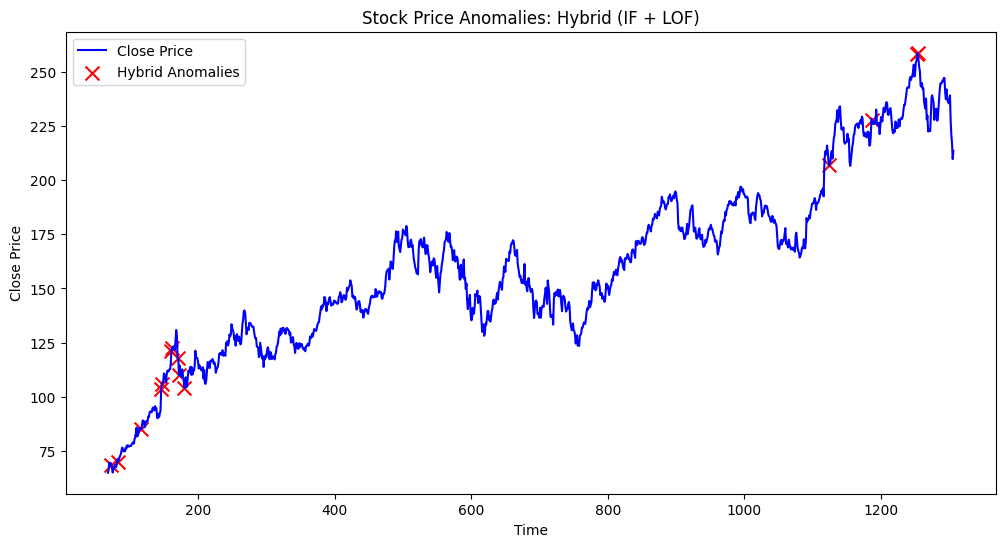

In [ ]:

df2['Hybrid_Anomalies'] = ((df2['Feature_Anomalies'] == -1) & (df2['LOF_Anomalies'] == -1)).astype(int)


plt.figure(figsize=(12,6))
plt.plot(df2.index, df2['Close'], color='blue', label='Close Price')


plt.scatter(df2[df2['Hybrid_Anomalies'] == 1].index,
            df2[df2['Hybrid_Anomalies'] == 1]['Close'],
            color='red', label='Hybrid Anomalies', marker='x', s=100)

plt.xlabel("Time")
plt.ylabel("Close Price")
plt.title("Stock Price Anomalies: Hybrid (IF + LOF)")
plt.legend()
plt.show()


**NOW WE WILL IMPLEMENT DBSCAN WHICH IS A VERY GOOD NN MODEl FOR ANOMALIES DETECTION, CLUSTERING BASED**

DBSCAN detected 530 anomalies.


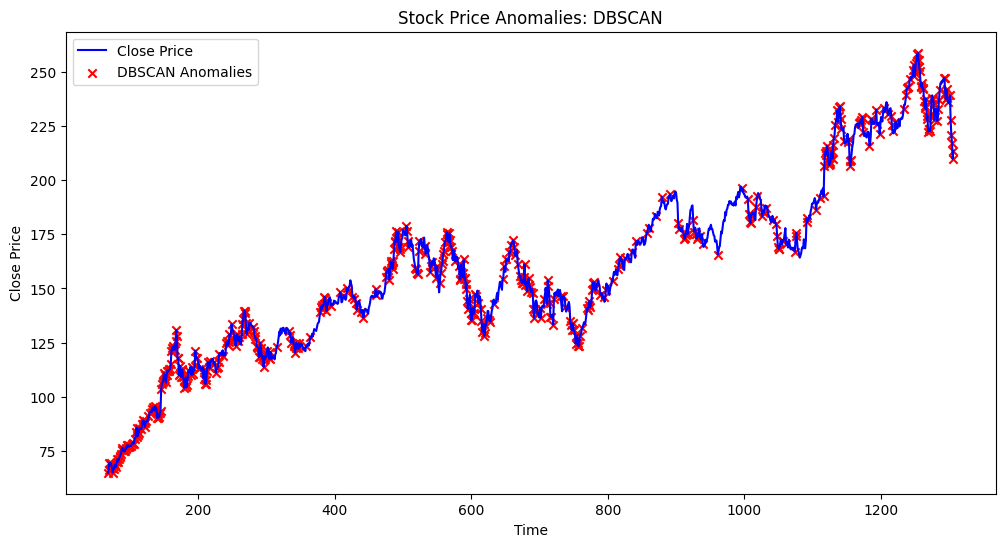

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt


features = df2[['Close', 'Volume', 'MA20', 'Upper_Band', 'Lower_Band', 'RSI', 'Log_Returns']]


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


eps_value = 0.5
min_samples_value = 5
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
df2['DBSCAN_Anomalies'] = dbscan.fit_predict(features_scaled)


anomalies_count = sum(df2['DBSCAN_Anomalies'] == -1)
print(f"DBSCAN detected {anomalies_count} anomalies.")


plt.figure(figsize=(12,6))
plt.plot(df2['Close'], color='blue', label='Close Price')
anomaly_points = df2[df2['DBSCAN_Anomalies'] == -1]
plt.scatter(anomaly_points.index, anomaly_points['Close'], color='red', label='DBSCAN Anomalies', marker='x')
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.title("Stock Price Anomalies: DBSCAN")
plt.legend()
plt.show()


**NOW WE WILL VALIDATE ALL THESE ANOMALIES WITH ACTUAL DATA FROM REAL STOCK EVENTS**

**✅ Earnings reports (quarterly financial results).
✅ Product launches (iPhone/Mac events).
✅ Legal issues, government regulations, or lawsuits.
✅ Market crashes or global events affecting stock prices.**

**We'll fetch historical data from Yahoo Finance API and Google Finance or Nasdaq. We will then overlay these anomalies on stock chart and comapre**


In [ ]:
##  GET REAL WORLD STOCK EVENTS
import yfinance as yf

ticker = yf.Ticker("AAPL")
news = ticker.news

news[:5]

[{'id': '53b89b5d-de89-35e9-8b09-1d6f3a09d815',
  'content': {'id': '53b89b5d-de89-35e9-8b09-1d6f3a09d815',
   'contentType': 'VIDEO',
   'title': 'Antitrust under Trump: Regulators lock in on Big Tech',
   'description': '<p>Antitrust regulators aren\'t backing down from cases against Big Tech names like <a data-i13n="cpos:1;pos:1" href="https://finance.yahoo.com/news/trumps-doj-wants-a-google-breakup-but-is-willing-to-leave-ai-alone-080016759.html">Alphabet</a> (<a data-i13n="cpos:2;pos:1" href="https://finance.yahoo.com/quote/GOOG">GOOG</a>, <a data-i13n="cpos:3;pos:1" href="https://finance.yahoo.com/quote/GOOGL">GOOGL</a>), Meta Platforms (<a data-i13n="cpos:4;pos:1" href="https://finance.yahoo.com/quote/META">META</a>), Apple (<a data-i13n="cpos:5;pos:1" href="https://finance.yahoo.com/quote/AAPL">AAPL</a>), Amazon (<a data-i13n="cpos:6;pos:1" href="https://finance.yahoo.com/quote/AMZN">AMZN</a>), and Microsoft (<a data-i13n="cpos:7;pos:1" href="https://finance.yahoo.com/quote/MSF

In [ ]:
## STEP 1 - Convert news to articles into a structered DataFrame
## STEP 2 - Compare news dates with anomaly dates in our dataset
## STEP 3 - Visualize anomalies on the stock chart with corresponding news labels.

##STEP 1 :-
# Convert news data into a structured DataFrame
import pandas as pd

# Extract the raw news list
news_list = ticker.news  # News from Yahoo Finance

# Process each news entry
news_data = []
for item in news_list:
    content = item.get("content", {})

    # Extract relevant fields safely
    news_entry = {
        "title": content.get("title", "No Title"),
        "summary": content.get("summary", "No Summary"),
        "Date": content.get("pubDate", "").split("T")[0],
        "Link": content.get("canonicalUrl", {}).get("url", "No Link")
    }

    news_data.append(news_entry)


news_df = pd.DataFrame(news_data)


news_df["Date"] = pd.to_datetime(news_df["Date"])


news_df.head()



,title,summary,Date,Link
0,Antitrust under Trump: Regulators lock in on B...,Antitrust regulators aren't backing down from ...,2025-03-14,https://finance.yahoo.com/video/antitrust-unde...
1,"Stock market today: Dow, S&P 500, Nasdaq close...",US stocks were higher amid a backdrop of scatt...,2025-02-05,https://finance.yahoo.com/news/live/stock-mark...
2,Why tech will be the 'biggest area of profit c...,Apple (AAPL) recently experienced a technical ...,2025-03-14,https://finance.yahoo.com/video/why-tech-bigge...
3,The best GPS running watches for 2025,Just because most of the best smartwatches hav...,2023-09-21,https://www.engadget.com/wearables/best-gps-ru...
4,Citi Removes Apple Inc. (AAPL) from Catalyst W...,We recently compiled a list of the 10 High Fly...,2025-03-14,https://finance.yahoo.com/news/citi-removes-ap...


In [ ]:
print(news_df.shape)

(10, 4)


In [ ]:
print(news_df.head(10))

                                               title  \
0  Antitrust under Trump: Regulators lock in on B...   
1  Stock market today: Dow, S&P 500, Nasdaq close...   
2  Why tech will be the 'biggest area of profit c...   
3              The best GPS running watches for 2025   
4  Citi Removes Apple Inc. (AAPL) from Catalyst W...   
5  Apple (AAPL) Rises But Trails Market: What Inv...   
6  Apple Inc. (AAPL) Faces Sluggish Growth as iPh...   
7  The Mag 7 Stocks Have Gotten Crushed. Buy Thes...   
8  Apple’s Siri Chief Calls AI Delays Ugly and Em...   
9  Magnificent Seven Stocks: Nvidia, Meta, Tesla ...   

                                             summary       Date  \
0  Antitrust regulators aren't backing down from ... 2025-03-14   
1  US stocks were higher amid a backdrop of scatt... 2025-02-05   
2  Apple (AAPL) recently experienced a technical ... 2025-03-14   
3  Just because most of the best smartwatches hav... 2023-09-21   
4  We recently compiled a list of the 10 High Fl

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# List of actual anomaly columns from your dataset
anomaly_columns = [
    "Anomaly_IF_Close", "Anomaly_IF_Volume", "Anomaly_IF_Returns", "Anomaly_IF_Features",
    "LOF_Anomalies", "Hybrid_Anomalies", "DBSCAN_Anomalies"
]

# Keep only columns that exist in df_cleaned
anomaly_columns = [col for col in anomaly_columns if col in df_cleaned.columns]

# Create a unified 'Anomaly' column (1 if any method detected an anomaly, else 0)
df_cleaned["Anomaly"] = df_cleaned[anomaly_columns].max(axis=1)


**NOW OUR LAST WORK, WE WILL TRY TO BUILD AN AI MODEL FOR ANOMALY DETECTION**

**AS WE HAVE ALREADY USED TRADITIONAL METHODS, NOW WE WILL USE DEEP LEARNING MODELS LIKE LSTM TO DETECT ANOMALIES BASED ON TIME SERIES PATTERN**

In [ ]:
## Train an LSTM model on stock data to predict price movements.
## Use reconstruction error to detect anomalies (i.e., when predicted price differs too much from actual).
## Compare LSTM’s anomaly detection with IF, LOF, and DBSCAN.
## WE ARE GONNA USE AUTOENCODERS FOR RECONSTRUCTION AND HIGH RECONSTRUCTION ERROR MEANS ANONALY.


In [ ]:
df_lstm_cleaned = df_cleaned.copy()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed

In [ ]:
# PREPPING THE DATA
# Compute RSI
def compute_rsi(series, period=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df_lstm_cleaned["RSI"] = compute_rsi(df_lstm_cleaned["Close"])


# Now, use df_lstm_cleaned for LSTM-specific processing
features = ["Close", "Volume", "SMA_20", "SMA_50", "EMA_20", "Volatility_20", "Upper_Band", "Lower_Band", "RSI"]
df_lstm = df_lstm_cleaned[features].copy()

In [ ]:
print("Checking NaN values in training data:", np.isnan(X_train).sum())
print("Checking NaN values in target data:", np.isnan(y_train).sum())

print("New X_train shape:", X_train.shape)
print("New y_train shape:", y_train.shape)

NameError: name 'X_train' is not defined

In [ ]:
df_lstm.dropna(inplace=True)

In [ ]:
# Remove samples where any NaN exists in X_train or y_train
print("Checking NaN values in training data:", np.isnan(X_train).sum())
print("Checking NaN values in target data:", np.isnan(y_train).sum())

#valid_indices = ~np.isnan(X_train).any(axis=(1,2)) & ~np.isnan(y_train).any(axis=(1,2))
#X_train = X_train[valid_indices]
#y_train = y_train[valid_indices]

# Print new shapes
print("New X_train shape:", X_train.shape)
print("New y_train shape:", y_train.shape)

#print("Checking NaN values in training data:", np.isnan(X_train).sum())
#print("Checking NaN values in target data:", np.isnan(y_train).sum())


In [ ]:
# LSTM WORKS BETTER WITH NORMALIZED DATA(0 and 1), so we convert entire dataframe to scaled numpy array
from sklearn.preprocessing import RobustScaler, MinMaxScaler
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df_lstm)

In [ ]:
def create_sequences(data, time_steps=30):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i : i + time_steps])  # Previous 30 days
        y.append(data[i : i + time_steps])  # Next day's data
    return np.array(X), np.array(y)

# Define the time window (past 30 days for each prediction)
TIME_STEPS = 30
X_train, y_train = create_sequences(df_scaled, TIME_STEPS)

# Print shapes to confirm data is correctly structured
print("X_train shape:", X_train.shape)  # Should be (num_samples, TIME_STEPS, num_features)
print("y_train shape:", y_train.shape)  # Should be (num_samples, num_features)

In [ ]:
print("Checking NaN values in training data:", np.isnan(X_train).sum())
print("Checking NaN values in target data:", np.isnan(y_train).sum())

In [ ]:
valid_indices = ~np.isnan(X_train).any(axis=(1,2)) & ~np.isnan(y_train).any(axis=(1,2))
X_train = X_train[valid_indices]
y_train = y_train[valid_indices]

# Print new shapes
print("New X_train shape:", X_train.shape)
print("New y_train shape:", y_train.shape)

print("Checking NaN values in training data:", np.isnan(X_train).sum())
print("Checking NaN values in target data:", np.isnan(y_train).sum())

In [ ]:
## NOW DATA IS SET AND WE MOVE TOWARDS LSTM MODEL TRAINING

model = Sequential([
    LSTM(48, activation='tanh', input_shape=(30, 9), return_sequences=True),
    Dropout(0.2),  # Prevent overfitting
    LSTM(32, activation='tanh', return_sequences=False),
    RepeatVector(30),  # Forces the model to reconstruct 30-day sequences
    LSTM(32, activation='tanh', return_sequences=True),
    Dropout(0.25),

    TimeDistributed(Dense(9))  # Output layer (same shape as input)
])
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(learning_rate=0.00005, clipvalue=0.5)
model.compile(optimizer=optimizer, loss='mse')
model.summary()

In [ ]:
print("Checking NaN values in training data:", np.isnan(X_train).sum())
print("Checking NaN values in target data:", np.isnan(y_train).sum())

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.00001)


In [ ]:
## NOW THAT OUR MODEL IS READY, WE WILL TRAIN IT

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split = 0.2,
    callbacks=[early_stopping, reduce_lr]  # Added fixes
)

In [ ]:
#checking for outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_lstm_cleaned["Close"], label="Close Price")
plt.title("Stock Close Prices Over Time")
plt.legend()
plt.show()


In [ ]:
#checking for outliers
import numpy as np

Q1 = df_lstm_cleaned["Close"].quantile(0.25)
Q3 = df_lstm_cleaned["Close"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_lstm_cleaned[(df_lstm_cleaned["Close"] < lower_bound) | (df_lstm_cleaned["Close"] > upper_bound)]
print("Number of Outliers:", len(outliers))


In [ ]:
y_pred = model.predict(X_train)


In [ ]:
from numpy import mean, square

reconstruction_errors = mean(square(y_train - y_pred), axis=(1,2))


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import median_abs_deviation

# Normalize reconstruction errors
normalized_errors = (reconstruction_errors - np.min(reconstruction_errors)) / \
                    (np.max(reconstruction_errors) - np.min(reconstruction_errors))

# Use only one method for thresholding (Choose One)
threshold = np.mean(normalized_errors) + (3 * np.std(normalized_errors))
anomalies = normalized_errors > threshold

# Plot Normalized Errors
plt.figure(figsize=(12, 6))
plt.plot(normalized_errors, label="Normalized Reconstruction Error")
plt.axhline(y=threshold, color='r', linestyle='--', label="Anomaly Threshold")
plt.legend()
plt.show()

# Compare Raw and Normalized Errors
plt.figure(figsize=(12, 6))
plt.plot(reconstruction_errors, label="Original Reconstruction Error", alpha=0.6)
plt.plot(normalized_errors, label="Normalized Error", alpha=0.8)
plt.axhline(y=threshold, color='r', linestyle='--', label="New Anomaly Threshold")
plt.legend()
plt.show()


In [ ]:
# Use MAD-based threshold
mad = median_abs_deviation(reconstruction_errors)
median = np.median(reconstruction_errors)
threshold = median + (3 * mad)  # Adjust the multiplier if needed

anomalies = reconstruction_errors > threshold

# Plot Normalized Errors
plt.figure(figsize=(12, 6))
plt.plot(reconstruction_errors, label="Original Reconstruction Error")
plt.axhline(y=threshold, color='r', linestyle='--', label="Anomaly Threshold")
plt.legend()
plt.show()


In [ ]:
threshold = np.mean(normalized_errors) + (3 * np.std(normalized_errors))
  # Adjust as needed
anomalies = reconstruction_errors > threshold


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(reconstruction_errors, label="Reconstruction Error")
plt.axhline(y=threshold, color='r', linestyle='--', label="Anomaly Threshold")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
window_size = 50  # Adjust based on dataset size
normalized_errors = (reconstruction_errors - np.min(reconstruction_errors)) / \
                    (np.max(reconstruction_errors) - np.min(reconstruction_errors))


threshold = np.mean(normalized_errors) + (3 * np.std(normalized_errors))  # Adjust '3' if needed
anomalies = normalized_errors > threshold


In [ ]:
from scipy.stats import median_abs_deviation

mad = median_abs_deviation(reconstruction_errors)
median = np.median(reconstruction_errors)

threshold = median + (3 * mad)  # 3-sigma rule for anomalies
anomalies = reconstruction_errors > threshold


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(normalized_errors, label="Normalized Reconstruction Error")
plt.axhline(y=threshold, color='r', linestyle='--', label="Anomaly Threshold")
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(reconstruction_errors, label="Original Reconstruction Error", alpha=0.6)
plt.plot(normalized_errors, label="Normalized Error", alpha=0.8)
plt.axhline(y=threshold, color='r', linestyle='--', label="New Anomaly Threshold")

plt.legend()
plt.show()
